<a href="https://colab.research.google.com/github/boxfather78/MLAI/blob/main/BP0254001_MLAI_Summative_Assessment_vF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='Orange'> Machine Learning & AI Summative Assessment - Part 1 (Cats & Dogs image classification) </font> 

* **Programme**: MSc Applied Data & Analytics (L7)
* **Module Name**: Machine Learning & Artificial Intelligence
* **Date of Submission**: 15/05/2023
* **Student Number**: BP0254001
* **Schedule Term**: May-22
* **Word Count**: 1,850


# <font color='Orange'> 1: Retrieve data for modelling </font> 


In [ ]:
# Download cat and dog images from zip file stored in a zip file with several folders. 
# A train and Validation Folder each with a folder containing cat images and dog images
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2023-04-20 19:23:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.128, 142.250.145.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  29.5MB/s    in 2.2s    

2023-04-20 19:23:35 (29.5 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
# Unzips and sorts into folders on specified local drive for training, validation and class.

import os
import zipfile

os.getcwd()

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Define cat/dog train/validation file paths

# Code below gives base directory and adds on folder to directory name for each additional directory
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat & dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our test cat & dog pictures
val_cats_dir = os.path.join(val_dir, 'cats')
val_dogs_dir = os.path.join(val_dir, 'dogs')

In [ ]:
#Check Volume of Images (expecting 2k training data and 1k validation data with equal cat/dog images in each)
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(val_cats_dir)))
print('total validation dog images:', len(os.listdir(val_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [ ]:
# Check filenames of first 10 files in each directory
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

val_cat_fnames = os.listdir(val_cats_dir)
print(val_cat_fnames[:10])

val_dog_fnames = os.listdir(val_dogs_dir)
print(val_dog_fnames[:10])

['cat.825.jpg', 'cat.849.jpg', 'cat.274.jpg', 'cat.802.jpg', 'cat.333.jpg', 'cat.980.jpg', 'cat.760.jpg', 'cat.77.jpg', 'cat.315.jpg', 'cat.277.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
['cat.2394.jpg', 'cat.2392.jpg', 'cat.2215.jpg', 'cat.2315.jpg', 'cat.2082.jpg', 'cat.2037.jpg', 'cat.2446.jpg', 'cat.2335.jpg', 'cat.2125.jpg', 'cat.2445.jpg']
['dog.2487.jpg', 'dog.2333.jpg', 'dog.2387.jpg', 'dog.2386.jpg', 'dog.2034.jpg', 'dog.2013.jpg', 'dog.2064.jpg', 'dog.2380.jpg', 'dog.2025.jpg', 'dog.2083.jpg']


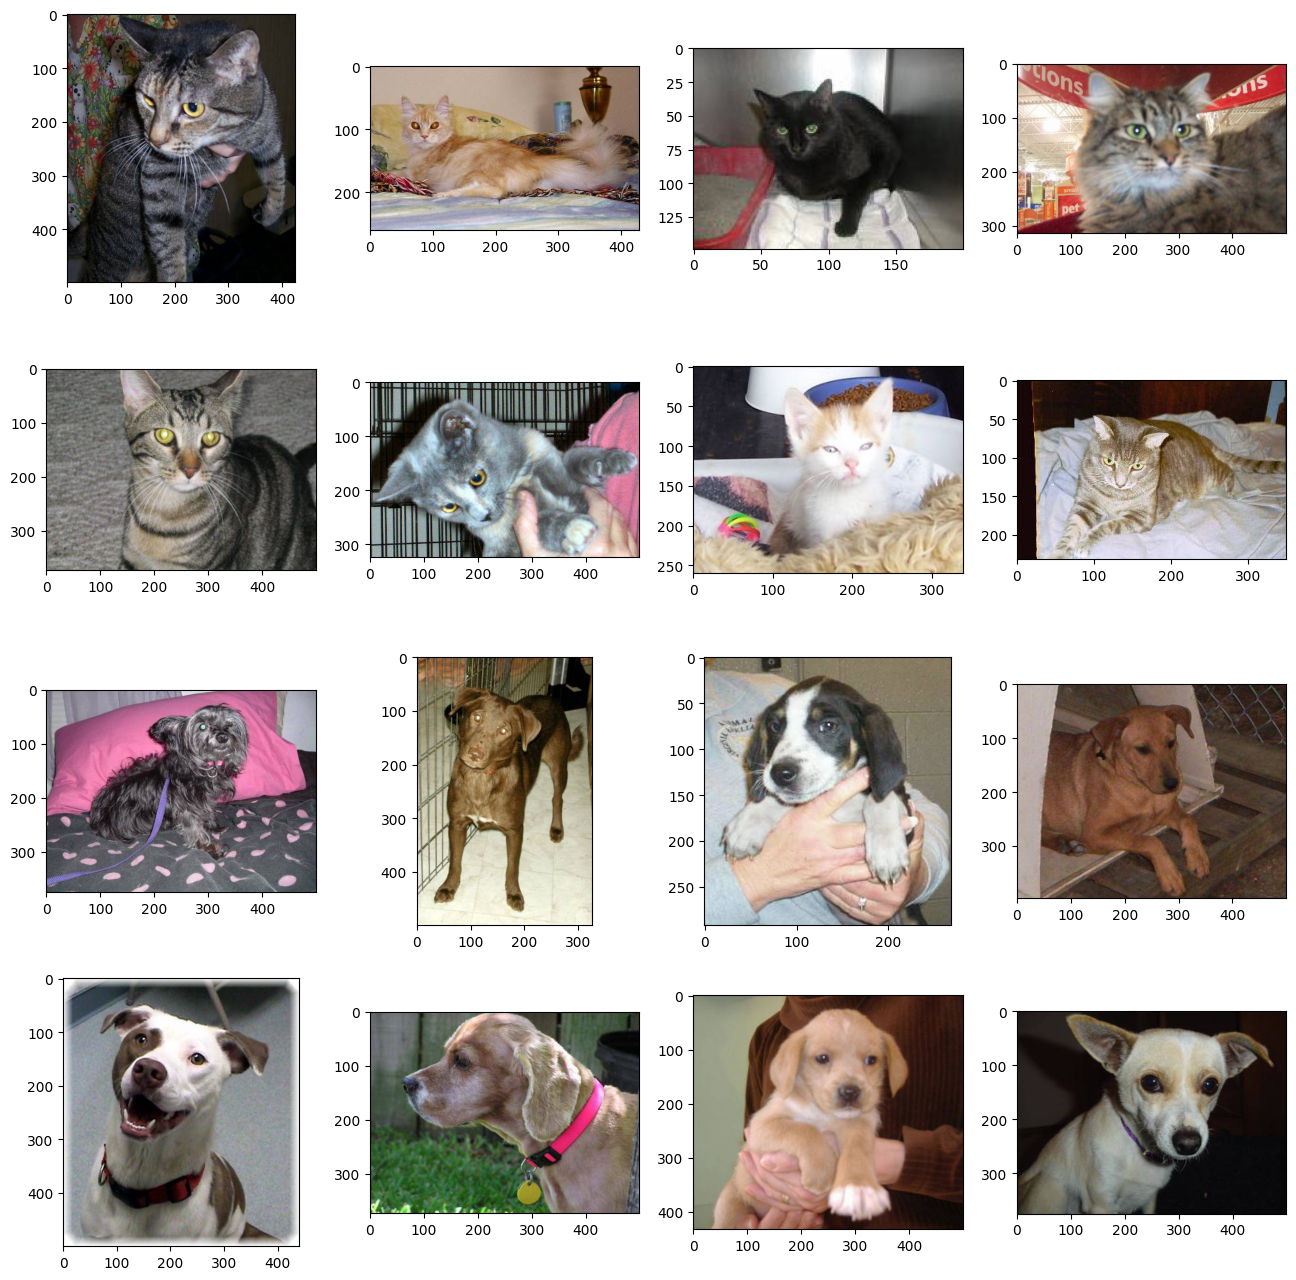

In [ ]:
# Use matplotlib to iterate over first 8 images from each train directory and show via plot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(16,16)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(4, 4, i + 1)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
'''I can also see that images are different sizes and aspect ratios. Standardising size will speed up training rate. 
I’ve chosen 150x150 pixels to keep a balance between size and quality, reducing computational load and improve model 
generalisation (Brownlee, 2019a). I can adjust this size as a hyperparameter later in the process if necessary.'''

# Before I standardise, let's view how the computer sees an example image.
print("Shape of data:",img.shape)
print("Data for first pixel, red hue:",img[0,0,0]) # This is the top left pixel of the first image, value for the Red hue
print("Data for first pixel, all hues:",img[0,0]) # This is the top left pixel for all three colour hues
print("Data for first row pixels, all hues:",img[0]) # This is the full RGB palette for the first row of the image
print("Data for all pixels, all hues:",img) # Finally, the full dataset for the image.

Shape of data: (375, 499, 3)
Data for first pixel, red hue: 31
Data for first pixel, all hues: [31 26 23]
Data for first row pixels, all hues: [[31 26 23]
 [31 26 23]
 [31 26 23]
 ...
 [22 11  5]
 [22 11  5]
 [22 11  5]]
Data for all pixels, all hues: [[[31 26 23]
  [31 26 23]
  [31 26 23]
  ...
  [22 11  5]
  [22 11  5]
  [22 11  5]]

 [[31 26 23]
  [31 26 23]
  [31 26 23]
  ...
  [22 11  5]
  [22 11  5]
  [22 11  5]]

 [[31 26 23]
  [31 26 23]
  [31 26 23]
  ...
  [23 12  6]
  [23 12  6]
  [23 12  6]]

 ...

 [[35 31 22]
  [37 33 24]
  [42 38 27]
  ...
  [ 8  6  7]
  [ 8  6  7]
  [ 8  6  7]]

 [[36 32 23]
  [39 35 26]
  [43 39 28]
  ...
  [ 7  5  6]
  [ 7  5  6]
  [ 7  5  6]]

 [[38 34 25]
  [40 36 27]
  [44 40 29]
  ...
  [ 7  5  6]
  [ 7  5  6]
  [ 7  5  6]]]


# <font color='Orange'> 2: Data Preprocessing </font>

In [ ]:
'''The Keras pre-processing ImageDataGenerator function allows me to import and 
adjust data as it flows into my train and validation inputs in batches (Tensorflow, n.d.).
`Flow_from_directory` creates train and validation datasets in batches of 20. This loads 
data and labels of 0 (cats) and 1 (dogs) to the CNN for train and validation. '''

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalise RGB values (0-255 scale) in Train and Test datasets by dividing by 255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

save_dir = os.mkdir('/tmp/cats_and_dogs_filtered/save')
img_out = os.path.join(base_dir, 'save') # creating folder for saved images, allowing to plot

'''Normalising data for neural networks can speed up the training rate and stability of a 
model build (Sola and Sevilla, 1997). The colours of my images are represented by 3 numbers 
between 0-255 (Red, Green and Blue spectrum), as shown above. I will normalise to 0-1 by dividing by 255.'''

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images defined above
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        shuffle=True, # Randomly sort images
        save_to_dir = img_out, # Save file to new directory so that we can check resizing.
        save_format="png",
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow test images in batches of 20 using test_datagen generator
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle = False, #We don't want to randomly sort these as we will keep the order to compare vs. predictions
        save_to_dir = img_out,
        save_format="png", 
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


(150, 150, 3)


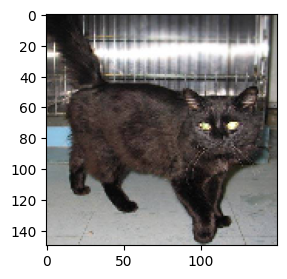

In [ ]:
# Take a look at a random resized image (run multiple times to view different images)
from IPython.core.display import display, HTML

batch = next(train_generator)  # returns single batch of images and labels 
img = batch[0][0]   # picks the first image from batch (as we are shuffling folder, it will pick a random image)
plt.figure(figsize=(3,3)) 
plt.imshow(img)   # shows the first image
print(img.shape) # validates the shape of the image

In [ ]:
# Looking at how an image is now viewed after reshaping and normalising.
print("Shape of data:",img.shape)
print("Data for first pixel, red hue:",img[0,0,0]) # This is the top left pixel of the image, value for the Red hue
print("Data for first pixel, all hues:",img[0,0]) # This is the top left pixel for all three colour hues
print("Data for first row pixels, all hues:",img[0]) # This is the full RGB palette for the first row of the image
print("Data for all pixels, all hues:",img) # Finally, the full dataset for the image.

Shape of data: (150, 150, 3)
Data for first pixel, red hue: 0.07450981
Data for first pixel, all hues: [0.07450981 0.07450981 0.07450981]
Data for first row pixels, all hues: [[0.07450981 0.07450981 0.07450981]
 [0.06666667 0.06666667 0.06666667]
 [0.0509804  0.0509804  0.0509804 ]
 [0.0509804  0.0509804  0.0509804 ]
 [0.04313726 0.04313726 0.04313726]
 [0.04705883 0.04705883 0.04705883]
 [0.04313726 0.04313726 0.04313726]
 [0.04313726 0.04313726 0.04313726]
 [0.04313726 0.04313726 0.04313726]
 [0.03921569 0.03921569 0.03921569]
 [0.03137255 0.03137255 0.03137255]
 [0.03921569 0.03921569 0.03921569]
 [0.03529412 0.03529412 0.03529412]
 [0.05882353 0.05882353 0.05882353]
 [0.08235294 0.08235294 0.08235294]
 [0.08627451 0.08627451 0.08627451]
 [0.08627451 0.08627451 0.08627451]
 [0.07843138 0.07843138 0.07843138]
 [0.08627451 0.07843138 0.08235294]
 [0.08627451 0.07843138 0.08235294]
 [0.09019608 0.08235294 0.08627451]
 [0.12941177 0.12156864 0.1254902 ]
 [0.16470589 0.15686275 0.1607843

#<font color='Orange'> 3: First CNN </font>

## <font color='Blue'> 3.1: Architecture </font>

A Convolutional Neural Network (CNN) contains at least one layer with convolutional operations, shown in Fig1. *(Brownlee, 2019b)*

<font color='Orange'>**Fig1: Convolutional operations with input image data** *(Kumar, 2021)*</font>
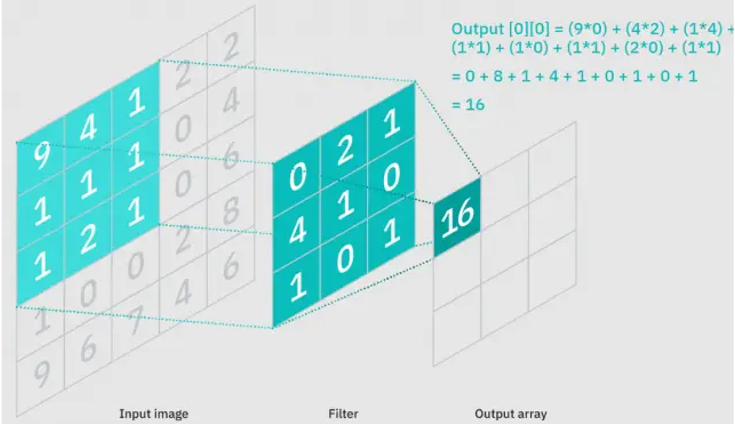

**Input layer** 

A Keras 2D convolution expects three dimensions - width, height and depth (colour matrix). Each image contains (150x150x3) 67,500 elements to analyse; (67,500x2,000) 135m across the full training dataset. 

**Convolutional layers** 

I have fewer filters in initial convolutional layers to detect low-level features, increasing for detecting finer details after reducing image size through maxpooling. Each filter will pass through Red, Green, and Blue layers of an image, creating three feature maps per filter *(Géron, 2019)*.  

I'll begin with a 3-layer network with convolution, ReLu, and maxpooling. The initial 3x3 filter has a single stride (i.e., no part of the image is skipped). I won't pad the image (add white space at edges), so dimensions will shrink to 148x148, resulting in 21,904 convolutions per filter. As image size halves, I can afford to invest CPU in more filters, so I double the volume at each convolution.

**Activation layers** 

Each element in the convolutional layer is passed through the Rectified Linear Units (ReLu) activation function shown, where x is the input: 

<font color='Red'>(x) = max(0, x) </font>

* Where x is positive, ReLU outputs x
* Where x is negative, ReLU outputs 0

According to *(Agarap, 2019)*, ReLU is computationally efficient, speeding up the convergence of stochastic gradient descent through keeping details with the strongest characteristics. *(Krizhevsky, Sutskever and Hinton, 2012)* found improved training time, convergence and performance when using ReLu for image classification. 

**Pooling** 

Pooling helps avoid overfitting by keeping the most vivid (highest pixel value) detail from each part of an image. A 2x2 filter takes the highest values from 4 pixels, reducing image size to take to the next convolutional layer *(Qayyam, 2022)*. 

**Fully connected layers** 

To input to the fully connected layer, I must flatten the output into a 1D vector. This is the product of image width, height, and filter depth at this stage, which is 18,496. Adding a fully connected layer with 512 hidden units gives me 9.47m connections. I'll fine-tune this value later. I'll use reLu to generate the final set of outputs followed by a Sigmoid activation to output a value between 0 and 1, representing the probability of my prediction being the positive class (dog). 

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Here I am programming the chosen CNN architecture
# 150x150x3 should be used to represent input feature map
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 32 filters that are 3x3 followed by max-pooling layer with a 2x2 window
# The stride refers to the number of pixels moved by the filter, while 'valid' padding means no white space will
# be added, hence the image will decrease in size. Both stride and padding values are default, so are shown
# here for demonstration purposes.
x = layers.Conv2D(16, (3, 3), activation='relu', strides=(1), padding='same')(img_input)
x = layers.MaxPooling2D(2, 2)(x)

# Second convolution extracts 64 filters that are 3x3 followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)

# Third convolution extracts 128 filters that are 3x3 followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

#  Output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
model = Model(img_input, output)

In [ ]:
# The table below summarises my model architecture, showing how the initial input shape decreases 
# in size through max-pooling with increasing feature maps based on the number of filters used at each stage.
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_18 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 73, 73, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 34, 34, 64)        1849

## <font color='Blue'> 3.2: Hyperparameters </font>

**Loss Function**
I will train the model using binary crossentropy loss which considers probabilities underlying outputs, so is a measure of uncertainty in binary classification. `Logloss` will be closer to zero for probablities closer to 1 or 0 *(Zammito, 2019)*.

**Loss Optimiser**
`Adam` adjusts learning rate dynamically based on history of gradient descent, achieving lowest loss number faster *(Kingma and Lei Ba, 2017)* compared Adam to other optimization algorithms, including SGD, Momentum, and RMSProp on image classification, finding that it outperforms for both convergence speed and final accuracy.

**Learning Rate** 
An initial learning rate of `0.001` will control the speed at which the optimiser converges towards zero loss. This can be optimised later through hyperparameter tuning.

**Evaluation Metric**
During training, I will monitor classification `accuracy` as the dataset has balanced classes. I can validate where the model performs well using a confusion matrix and adjust evaluation metric if the output favours correct prediction of one class. 

**Epochs & Batches**
I will use `10 epochs` so that the initial build and assessment optimises the CPU available. Batch size loads 20 images at once, reducing RAM requirements and providing 100 samples to test weights per epoch *(Brownlee, 2020)*. 
 
**Drop-out**
Dropout randomly replaces the value of a percentage of input neurons with zero to stimulate more generalised networks. I will first validate architecture performance and incorporate dropout later on.

In [ ]:
# Compile the model with specified loss, loss optimiser and evaluation metric
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
# Train the model by loading all 2000 images in batches, using the validation data to check generalisation.
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images / batch_size (20) = steps
      epochs=10,
      validation_data=val_generator,
      validation_steps=50,  # 1000 images / batch_size (20) = steps
      verbose=2) # show detail as one line per epoch

Epoch 1/10
100/100 - 37s - loss: 0.6841 - accuracy: 0.5660 - val_loss: 0.6550 - val_accuracy: 0.5670 - 37s/epoch - 368ms/step
Epoch 2/10
100/100 - 30s - loss: 0.6054 - accuracy: 0.6705 - val_loss: 0.5894 - val_accuracy: 0.6760 - 30s/epoch - 299ms/step
Epoch 3/10
100/100 - 30s - loss: 0.5356 - accuracy: 0.7305 - val_loss: 0.5975 - val_accuracy: 0.6940 - 30s/epoch - 302ms/step
Epoch 4/10
100/100 - 30s - loss: 0.4656 - accuracy: 0.7795 - val_loss: 0.6490 - val_accuracy: 0.6920 - 30s/epoch - 304ms/step
Epoch 5/10
100/100 - 30s - loss: 0.3731 - accuracy: 0.8280 - val_loss: 0.6223 - val_accuracy: 0.7050 - 30s/epoch - 303ms/step
Epoch 6/10
100/100 - 29s - loss: 0.2923 - accuracy: 0.8690 - val_loss: 0.7142 - val_accuracy: 0.7010 - 29s/epoch - 290ms/step
Epoch 7/10
100/100 - 29s - loss: 0.1928 - accuracy: 0.9200 - val_loss: 0.8261 - val_accuracy: 0.6980 - 29s/epoch - 292ms/step
Epoch 8/10
100/100 - 30s - loss: 0.1485 - accuracy: 0.9445 - val_loss: 1.0255 - val_accuracy: 0.7060 - 30s/epoch - 298

In [ ]:
# Save the model for later reference
from tensorflow import keras
from google.colab import files

model_path = os.path.join(base_dir, 'save')
keras.models.save_model(model, 'cnn_model_1')

## <font color='Blue'> 3.3: Evaluation</font>
Based on outcomes above, the model minimises loss on the train dataset with **0.066 loss and 98% accuracy**. However, the model does not generalise well on validation, evidenced by increasing loss and only 70% accuracy. 

The overfitting can be seen visually in the charts below, which shows loss value by epoch. Train and validation loss deviate from the third epoch onwards, while validation loss trends upwards, suggesting that adding more epochs won't stop the overfitting.

Overfitting may be occuring because 2000 isn't much data to learn from. My model is focusing on features in the training set that aren't present in the validation set (e.g. a chair/hand).

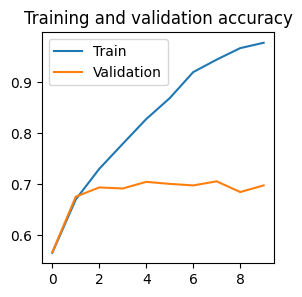

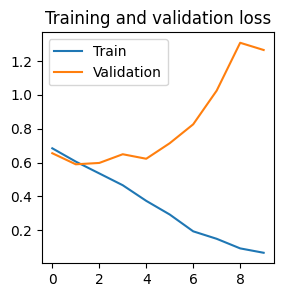

In [ ]:
### Charting the loss and accuracy by epoch ###
# Create list of Loss and Accuracy results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Number of epochs

plt.figure(figsize=(3,3)) 
# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.gca().legend(('Train','Validation'))

plt.figure(figsize=(3,3)) 

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.gca().legend(('Train','Validation'))


In [ ]:
import numpy as np

# I will predict the model outputs on our validation dataset
preds = model.predict(val_generator)
y_pred = np.round(preds) # Rounds Sigmoid output value to integer (1=dog or 0=cat) 
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())

50/50 [==============================] - 10s 188ms/step


In [ ]:
# Create dataframe showing Predicted outputs vs. Actual outputs with labels for validation dataset.
import pandas as pd

print(val_generator.class_indices)
df = pd.DataFrame({'Actual': np.ndarray.tolist(y_true), 
                       'Predicted': np.ndarray.tolist(y_pred), 
                       'Sigmoid output': np.ndarray.tolist(np.round((preds),4))})

df['Predicted'] = df['Predicted'].str.get(0)
df['Sigmoid output'] = df['Sigmoid output'].str.get(0)

# Add class labels
df['Actual_Class'] = ''
for i in range(len(df)):
    if df.loc[i, 'Actual'] == 0:
        df.loc[i, 'Actual_Class'] = 'Cat'
    else:
        df.loc[i, 'Actual_Class'] = 'Dog'
df['Predicted_Class'] = ''
for i in range(len(df)):
    if df.loc[i, 'Predicted'] == 0:
        df.loc[i, 'Predicted_Class'] = 'Cat'
    else:
        df.loc[i, 'Predicted_Class'] = 'Dog'

print(df.head(10))
print(df.tail(10))

{'cats': 0, 'dogs': 1}
   Actual  Predicted  Sigmoid output Actual_Class Predicted_Class
0       0        0.0          0.4953          Cat             Cat
1       0        0.0          0.4847          Cat             Cat
2       0        0.0          0.4851          Cat             Cat
3       0        0.0          0.4837          Cat             Cat
4       0        0.0          0.4993          Cat             Cat
5       0        0.0          0.4928          Cat             Cat
6       0        0.0          0.4781          Cat             Cat
7       0        1.0          0.5009          Cat             Dog
8       0        1.0          0.5103          Cat             Dog
9       0        0.0          0.4978          Cat             Cat
     Actual  Predicted  Sigmoid output Actual_Class Predicted_Class
990       1        0.0          0.4992          Dog             Cat
991       1        0.0          0.4924          Dog             Cat
992       1        0.0          0.4852         

              precision    recall  f1-score   support

        cats       0.69      0.72      0.70       500
        dogs       0.71      0.68      0.69       500

    accuracy                           0.70      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.70      0.70      0.70      1000



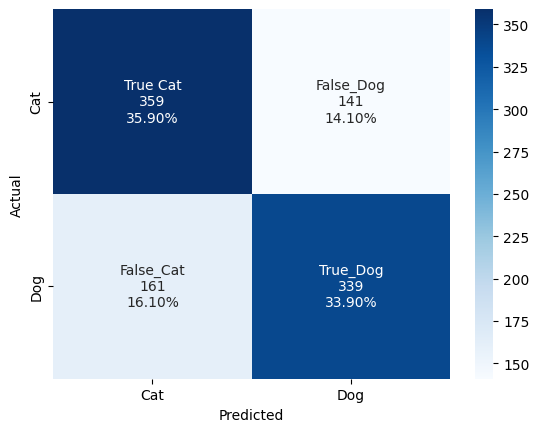

In [ ]:
%matplotlib inline
# Show confusion matrix & classification report
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

class_rep = classification_report(y_true, y_pred, target_names=class_names)
conf_mat = confusion_matrix(y_true, y_pred)

categories = ['Cat', 'Dog']
group_names = ['True Cat','False_Dog','False_Cat','True_Dog']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_mat, annot=labels, fmt='', 
            xticklabels=categories, 
            yticklabels=categories,
            cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

print(class_rep)

My first CNN has labelled 52% of images as cat and 48% as dog, with a validation accuracy of 70%.  My Sigmoid values aren't close to 1 or 0 meaning the CNN could be struggling to differentiate the images.

# <font color='Orange'> 4: Second CNN </font>

## <font color='Blue'> 4.1: Preventing overfitting using data augmentation

I can help my model improve classification of new shapes or images by increasing sample size, adding drop-out or maxpooling layers or augmenting existing data. Augmenting image data randomly means my CNN is trained using different images per batch and epoch, helping it learn new variants and recognise different features in unseen data *(Perez and Wang, 2017)*. This is an example of feature transference *(Atienza, 2021)*. Augmentation examples are shown below.

In [ ]:
# Setting up a generator that randomly adjusts each image according to adjustable parameters below
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=45, # degrees of rotation is up to 45
      width_shift_range=0.15, # shifts image by up to 15% left or right horizontally
      height_shift_range=0.15, # shifts image vertically
      brightness_range=(0.8, 1.2), # multiplies pixel value by range between the two numbers shown
      shear_range=0.2, # moves bottom of picture horizontally by up to 20%
      zoom_range=0.2, # zooms into picture by up to 20%
      horizontal_flip=True, # randomly flips image horizontally
      vertical_flip=False, # in this case we won't flip vertically as we don't need to recognise upside down images
      fill_mode='nearest') # fills any new pixels created by above operations with value of nearest pixel

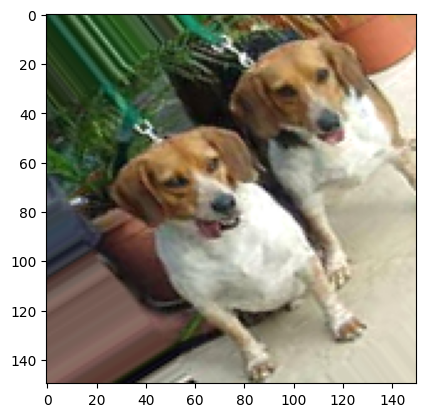

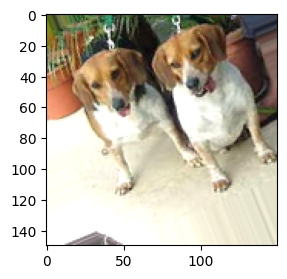

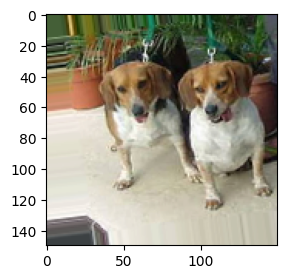

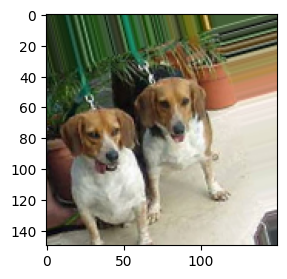

<Figure size 300x300 with 0 Axes>

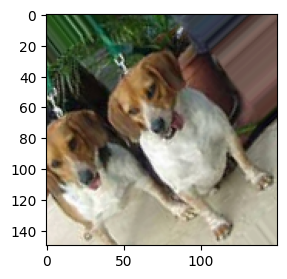

In [ ]:
# Show random image augmentation of a randomly selected dog
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

rand_index = np.random.randint(0, len(train_dog_fnames)) # choose random image number

img_path = os.path.join(train_dogs_dir, train_dog_fnames[rand_index])
img = load_img(img_path, target_size=(150, 150)) 
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Generates batches of randomly transformed images until i = j
i = 0
j = 5
for batch in datagen.flow(x, batch_size=1): 
  plt.figure(figsize=(3,3))
  fig.tight_layout()
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i == j:
    break

In [ ]:
'''The augmentation parameters are applied to the training dataset, normalising the RGB range and scaling 
image sizes as before.'''

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45, # degrees of rotation is up to 45
    width_shift_range=0.15, # shifts image by up to 15% left or right horizontally
    height_shift_range=0.15, # shifts image vertically
    brightness_range=(0.8, 1.2), # multiplies pixel value by range between the two numbers shown
    shear_range=0.2, # moves bottom of picture horizontally by up to 20%
    zoom_range=0.2, # zooms into picture by up to 20%
    horizontal_flip=True, # randomly flips image horizontally
    vertical_flip=False, # in this case we won't flip vertically as we don't need to recognise upside down images
    fill_mode='nearest') # fills any new pixels created by above operations with value of nearest pixel

# I won't augment the validation dataset, since we wouldn't expect to see augmented data in the real world.
images presented for classification in the real world.
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=20,
        shuffle=True,
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=False,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## <font color='Blue'>4.2: Architecture


In [ ]:
# My new CNN uses the same architecture so that I can measure the impact of image augmentation. 

# Bring in saved model architecture
from tensorflow.keras import models

model2 = models.load_model('cnn_model_1')
# Check architecture
model2.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_18 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 73, 73, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 34, 34, 64)        1849

In [ ]:
# Train model with same parameters, loss, optimiser and evaluation metric
model2.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model2.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=val_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/10
100/100 - 24s - loss: 0.6659 - accuracy: 0.6565 - val_loss: 0.5344 - val_accuracy: 0.7320 - 24s/epoch - 236ms/step
Epoch 2/10
100/100 - 22s - loss: 0.5788 - accuracy: 0.6960 - val_loss: 0.5428 - val_accuracy: 0.7200 - 22s/epoch - 222ms/step
Epoch 3/10
100/100 - 21s - loss: 0.5762 - accuracy: 0.6915 - val_loss: 0.5178 - val_accuracy: 0.7620 - 21s/epoch - 213ms/step
Epoch 4/10
100/100 - 22s - loss: 0.5773 - accuracy: 0.6920 - val_loss: 0.5566 - val_accuracy: 0.7070 - 22s/epoch - 224ms/step
Epoch 5/10
100/100 - 24s - loss: 0.5591 - accuracy: 0.7130 - val_loss: 0.5223 - val_accuracy: 0.7300 - 24s/epoch - 235ms/step
Epoch 6/10
100/100 - 21s - loss: 0.5468 - accuracy: 0.7270 - val_loss: 0.5350 - val_accuracy: 0.7310 - 21s/epoch - 213ms/step
Epoch 7/10
100/100 - 20s - loss: 0.5521 - accuracy: 0.7145 - val_loss: 0.5094 - val_accuracy: 0.7480 - 20s/epoch - 202ms/step
Epoch 8/10
100/100 - 21s - loss: 0.5376 - accuracy: 0.7365 - val_loss: 0.5160 - val_accuracy: 0.7430 - 21s/epoch - 214

In [ ]:
# Save the model for later reference
from tensorflow import keras
from google.colab import files

model_path = os.path.join(base_dir, 'save')
keras.models.save_model(model2, 'cnn_model_2')

## <font color='Blue'>4.3: Evaluation </font>

Generalisation improvement is evident from similar loss and accuracy figures across training and validation sets. The metrics' choppiness with additional epochs suggests that increasing epochs during hyperparameter tuning could be worth exploring. 

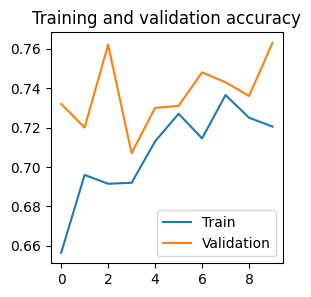

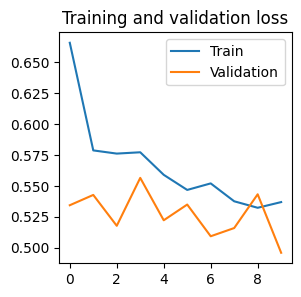

In [ ]:
### Charting the loss and accuracy by epoch ###
# Create list of Loss and Accuracy results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Number of epochs

plt.figure(figsize=(3,3))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.gca().legend(('Train','Validation'))

plt.figure(figsize=(3,3))

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.gca().legend(('Train','Validation'))

In [ ]:
# I will predict the model outputs on our validation dataset
preds = model2.predict(val_generator, verbose=2)
y_pred = np.round(preds) # Takes Sigmoid output value between 0 and 1, which is probability of belonging positive class (1 = 
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())
print(model2.predict(val_generator).shape)

50/50 - 3s - 3s/epoch - 58ms/step
50/50 [==============================] - 3s 60ms/step
(1000, 1)


In [ ]:
# Create dataframe showing Predicted outputs vs. Actual outputs with labels for validation dataset.
import pandas as pd

print(val_generator.class_indices)
df = pd.DataFrame({'Actual': np.ndarray.tolist(y_true), 
                       'Predicted': np.ndarray.tolist(y_pred), 
                       'Sigmoid output': np.ndarray.tolist(np.round((preds),4))})

df['Predicted'] = df['Predicted'].str.get(0)
df['Sigmoid output'] = df['Sigmoid output'].str.get(0)

# Add class labels
df['Actual_Class'] = ''
for i in range(len(df)):
    if df.loc[i, 'Actual'] == 0:
        df.loc[i, 'Actual_Class'] = 'Cat'
    else:
        df.loc[i, 'Actual_Class'] = 'Dog'
df['Predicted_Class'] = ''
for i in range(len(df)):
    if df.loc[i, 'Predicted'] == 0:
        df.loc[i, 'Predicted_Class'] = 'Cat'
    else:
        df.loc[i, 'Predicted_Class'] = 'Dog'

print(df.head(10))
print(df.tail(10))

{'cats': 0, 'dogs': 1}
   Actual  Predicted  Sigmoid output Actual_Class Predicted_Class
0       0        1.0          0.5802          Cat             Dog
1       0        0.0          0.4593          Cat             Cat
2       0        0.0          0.2165          Cat             Cat
3       0        0.0          0.0186          Cat             Cat
4       0        0.0          0.4794          Cat             Cat
5       0        0.0          0.1325          Cat             Cat
6       0        1.0          0.7163          Cat             Dog
7       0        0.0          0.1854          Cat             Cat
8       0        0.0          0.1341          Cat             Cat
9       0        1.0          0.6741          Cat             Dog
     Actual  Predicted  Sigmoid output Actual_Class Predicted_Class
990       1        1.0          0.6193          Dog             Dog
991       1        1.0          0.9959          Dog             Dog
992       1        1.0          0.6913         

              precision    recall  f1-score   support

        cats       0.78      0.74      0.76       500
        dogs       0.75      0.79      0.77       500

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



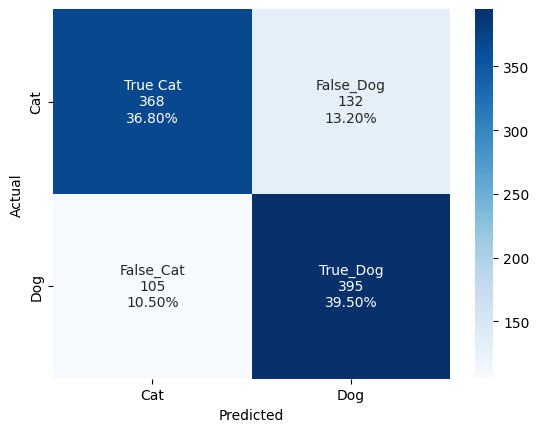

In [ ]:
# Show confusion matrix & classification report
class_rep = classification_report(y_true, y_pred, target_names=class_names)
conf_mat = confusion_matrix(y_true, y_pred)

categories = ['Cat', 'Dog']
group_names = ['True Cat','False_Dog','False_Cat','True_Dog']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_mat, annot=labels, fmt='', 
            xticklabels=categories, 
            yticklabels=categories,
            cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

print(class_rep)

My second CNN has labelled **47.3%** of images as cat and **52.7%** as dog, with an improved validation accuracy of **76%**. Sigmoid values are now closer to 0 and 1, but there are still 237 misclassified images.

#<font color='Orange'> 5: Third CNN

## <font color='Blue'> 5.1: Hyperparameter Optimisation</font>

To improve performance of CNNs I have built so far I will test the impact of changing some hyperparameters (HP) to improve the accuracy of my predictions: 

* Drop-out 
* Neurons in fully-connected layer 
* Learning rate 
* Number of filters in convolutional layers 

I'll focus on tuning dropout for regularisation and learning rate for faster convergence during optimisation (see Fig2). Although batch size, epochs, and optimiser could also be tuned, I have limited compute power and believe these won’t have such a great impact on accuracy.  

<font color='Orange'>**Fig2: Importance of Learning Rate optimisation in finding minimum loss** *(Rendyk, 2021)* </font>
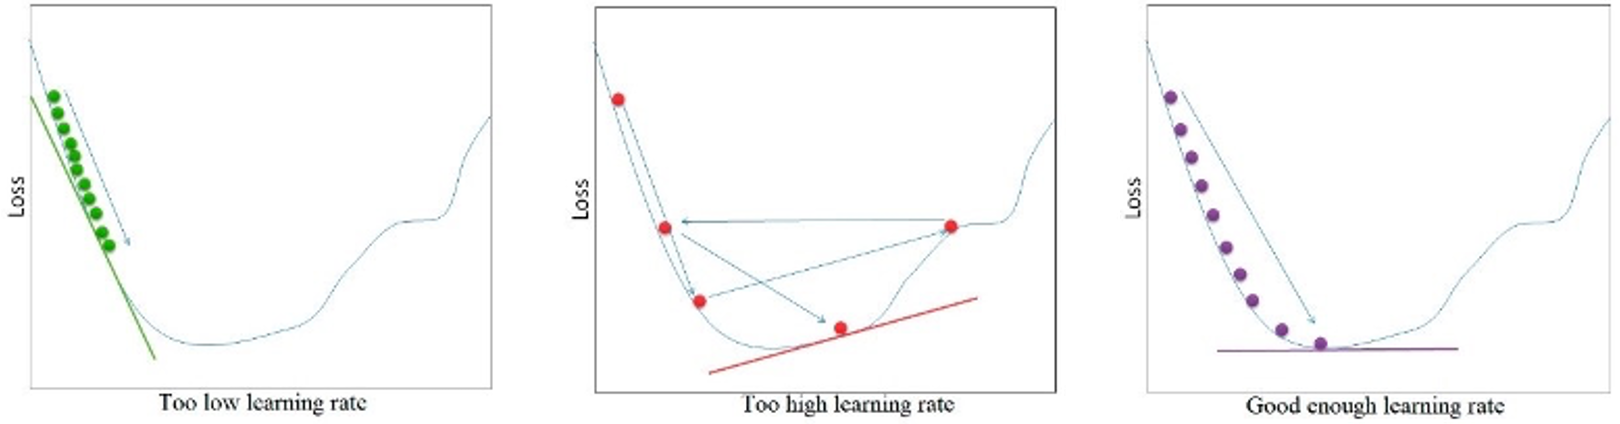

I will test two HP tuners from Keras Tuner to see which approach arrives at the best accuracy (see Fig3). 

<font color='Orange'>**Fig3: Features of Bayesian Optimisation vs. Hyperband** *(Mehta, 2022)*</font>

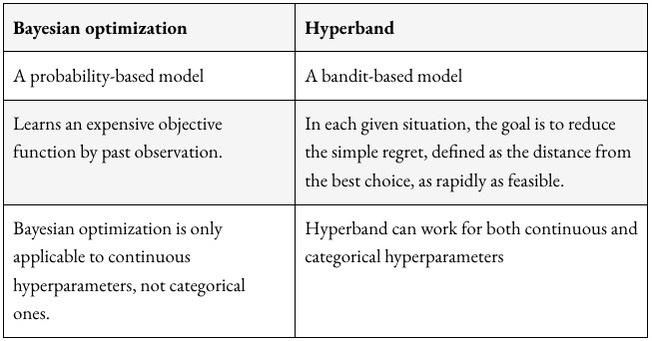

**Hyperband** uses a broad range of HPs to estimate performance, then allocates more resources to top performing trials. Hyperband outperformed other HP tuning algorithms for efficiency and effectiveness on several benchmark image datasets *(Li, Jamieson, and Rostamizadeh, 2018)*. *(Abraham, 2020)* improved performance further by adjusting Hyperband parameters. 

**Bayesian Optimization (BO)** uses probability to explore HP permutations, balancing exploration of uncertain regions and exploitation of regions with higher gains is described by *(Agnihotri and Batra, 2020)* using a gold-rush analogy. Keras Tuner's BO computes expected improvement in validation accuracy over the current best value, choosing HPs with a high probability of improvement, working well with distributed compute for early exploration *(Ranjit et al., 2019)*. 



In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 11.3 MB/s eta 0:00:00


### 5.1.1 Initialising Hyperparameter Tuners

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Define the model builder function
def build_model(hp):
    # Define the input shape
    input_shape = (150, 150, 3)

    # Define the hyperparameters
    num_filters = hp.Int('num_filters', min_value=16, max_value=128, step=16)
    n_neurons = hp.Int('n_neurons', min_value=16, max_value=1028, step=32)
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.2, step=0.01)

    # Define the model architecture using the Keras Functional API
    inputs = keras.Input(shape=input_shape)
    x = layers.Conv2D(num_filters,(3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(rate=dropout_rate)(x)
    x = layers.Conv2D(num_filters, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(rate=dropout_rate)(x)
    x = layers.Conv2D(num_filters, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(rate=dropout_rate)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(n_neurons, activation='relu')(x)
    x = layers.Dropout(rate=dropout_rate)(x)
    x = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs=inputs, outputs=x)

    # Compile the model
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

<ipython-input-49-dc88676a88ca>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization


In [ ]:
# Redefine the image generators with data augmentation on train dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45, # degrees of rotation is up to 45
    width_shift_range=0.15, # shifts image by up to 15% left or right horizontally
    height_shift_range=0.15, # shifts image vertically
    brightness_range=(0.8, 1.2), # multiplies pixel value by range between the two numbers shown
    shear_range=0.2, # moves bottom of picture horizontally by up to 20%
    zoom_range=0.2, # zooms into picture by up to 20%
    horizontal_flip=True, # randomly flips image horizontally
    vertical_flip=False, # in this case we won't flip vertically as we don't need to recognise upside down images
    fill_mode='nearest') # fills any new pixels created by above operations with value of nearest pixel

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=20,
        shuffle=True,
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=False,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Defining my two tuners to trial
hyper = Hyperband(
    build_model,
    objective='val_accuracy', # Using validation accuracy as our goal
    max_epochs=10, # maximum number of epochs to trial with each combination of HPs 
    hyperband_iterations=1, # default; maximum iterations allocated to each configuration
    factor=3, # default; reduction factor for each halving round
    directory='save',
    project_name='hyperband')

bayes = BayesianOptimization(
    build_model,
    objective='val_accuracy', # Using validation accuracy as our goal
    max_trials=15, # represents the hyperparameter combinations that will be tested by the tuner
    executions_per_trial=1, # default; models built and fit for each trial for robustness purposes
    alpha=1e-4, # default; using a higher value will favour exploration within the HP space
    beta=2.6, # default; higher value favours searching values that will harbour good outcomes based on probability
    directory='save',
    project_name='bayesian')

In [ ]:
# The command below shows a summary of the hyperparameters in our search space.
hyper.search_space_summary(extended=False)

Search space summary
Default search space size: 4
num_filters (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
n_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 1028, 'step': 32, 'sampling': 'linear'}
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.2, 'step': 0.01, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


### 5.1.2 Hyperband Tuner

In [ ]:
# Choose the tuner to use and train 
tuner = hyper

# To reduce wasted compute power and improve runtime, I will stop early if there is no improvement in 
# validation loss over 3 consecutive epochs 
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min', patience=3)

# Train the model using the tuner (this replaces model.fit) 
tuner.search(train_generator, 
             epochs=10, 
             validation_data=val_generator, 
             verbose=1,
             callbacks=[stop_early])

Trial 30 Complete [00h 04m 32s]
val_accuracy: 0.593999981880188

Best val_accuracy So Far: 0.7110000252723694
Total elapsed time: 00h 57m 19s


In [ ]:
# Evaluate the best model, specific details, and a dictionary of hyperparameters
import tensorflow as tf

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
res_summ = tuner.results_summary(num_trials=3)

print('\n', "HP Tuner user: ", tuner,'\n')
print("Best model accuracy: ", best_model.evaluate(val_generator)[1])
print("Best Number of Filters: ", best_hyperparameters.get('num_filters'))
print("Best Hidden Units: ", best_hyperparameters.get('n_neurons'))
print("Best Learning Rate: ", best_hyperparameters.get('learning_rate'))
print("Best Dropout rate: ", best_hyperparameters.get('dropout_rate'))
print("Best Epochs: ", best_hyperparameters.get('tuner/epochs'),'\n')
print("Best hyperparameters: ", best_hyperparameters.values,'\n')
# See top 3 results to see which other parameters produced good outcomes
print(res_summ,'\n')
# Visualise model architecture and parameters
print("Best model architecture", best_model.summary(),'\n')

Results summary
Results in save/hyperband
Showing 3 best trials
Objective(name="val_accuracy", direction="max")

Trial 0016 summary
Hyperparameters:
num_filters: 128
n_neurons: 528
dropout_rate: 0.14
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.7110000252723694

Trial 0017 summary
Hyperparameters:
num_filters: 80
n_neurons: 880
dropout_rate: 0.19
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0014
Score: 0.7020000219345093

Trial 0024 summary
Hyperparameters:
num_filters: 64
n_neurons: 848
dropout_rate: 0.16
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0023
Score: 0.6940000057220459

 HP Tuner user:  <keras_tuner.tuners.hyperband.Hyperband object at 0x7f4911369f10> 

50/50 [==============================] - 4s 74ms/step - loss: 0.5599 - accuracy: 0.7110
Best model accuracy:  0.71100

**Hyperband Evaluation:** Accuracy hasn’t improved over 30 trials. My best is 71%, using hyperparameters below. 

**Best Hyperparameters:** 

* Best Number of Filters: 128 
* Best Hidden Units: 528 
* Best Dropout rate: 0.14 
* Best Learning Rate: 0.0001

### 5.1.3 Bayesian Optimisation Tuner

In [ ]:
# Choose the Bayes tuner to use and train 
tuner = bayes

# Stop early if no improvement in 3 epochs 
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min', patience=3)

# Train the model using the tuner (this replaces model.fit) 
tuner.search(train_generator, 
             epochs=10, 
             validation_data=val_generator, 
             verbose=1,
             callbacks=[stop_early])

Trial 15 Complete [00h 03m 26s]
val_accuracy: 0.6589999794960022

Best val_accuracy So Far: 0.7059999704360962
Total elapsed time: 00h 50m 23s


In [ ]:
# Evaluate the best model, specific details, and a dictionary of hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
res_summ = tuner.results_summary(num_trials=3)

print('\n', "HP Tuner used: ", tuner,'\n')
print("Best model accuracy: ", best_model.evaluate(val_generator)[1])
print("Best Number of Filters: ", best_hyperparameters.get('num_filters'))
print("Best Hidden Units: ", best_hyperparameters.get('n_neurons'))
print("Best Learning Rate: ", best_hyperparameters.get('learning_rate'))
print("Best Dropout rate: ", best_hyperparameters.get('dropout_rate'))
print("Best hyperparameters: ", best_hyperparameters.values,'\n')
# See top 3 results to see which other parameters produced good outcomes
print(res_summ,'\n')
# Visualise model architecture and parameters
print("Best model architecture", best_model.summary(),'\n')

Results summary
Results in save/bayesian
Showing 3 best trials
Objective(name="val_accuracy", direction="max")

Trial 05 summary
Hyperparameters:
num_filters: 128
n_neurons: 48
dropout_rate: 0.1
learning_rate: 0.0001
Score: 0.7059999704360962

Trial 08 summary
Hyperparameters:
num_filters: 80
n_neurons: 80
dropout_rate: 0.12000000000000001
learning_rate: 0.0001
Score: 0.7049999833106995

Trial 01 summary
Hyperparameters:
num_filters: 64
n_neurons: 176
dropout_rate: 0.19
learning_rate: 0.0001
Score: 0.6980000138282776

 HP Tuner used:  <keras_tuner.tuners.bayesian.BayesianOptimization object at 0x7eff21b1f850> 

50/50 [==============================] - 5s 83ms/step - loss: 0.5695 - accuracy: 0.7060
Best model accuracy:  0.7059999704360962
Best Number of Filters:  128
Best Hidden Units:  48
Best Learning Rate:  0.0001
Best Dropout rate:  0.1
Best hyperparameters:  {'num_filters': 128, 'n_neurons': 48, 'dropout_rate': 0.1, 'learning_rate': 0.0001} 

None 

Model: "model"
_________________

**Bayesian Evaluation** Accuracy isn’t improved over 15 trials. My best is 70.6%, using hyperparameters below. 

**Best Hyperparameters:**

* Best Number of Filters: 128 
* Best Hidden Units: 48 
* Best Dropout rate: 0.1 
* Best Learning Rate: 0.0001 

The number of neurons and dropout rate are very different to the Hyperband tuner, though filters and learning rate are consistent across tuners.

## <font color='Blue'> 5.2: Train using best Hyperparameters</font>

In [ ]:
# Retrain model using the best hyper-parameters for filters, hidden units, learning rate and drop out. 
# This time, I will try 50 epochs but build in early stopping if there is no loss improvement for 5 epochs.

tuner = hyper

model3 = tuner.hypermodel.build(best_hyperparameters)

# Stop early if no improvement in 5 epochs 
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min', patience=5)

model3.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model3.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=val_generator,
      validation_steps=50,
      verbose=2, callbacks=[stop_early])

Epoch 1/50
100/100 - 28s - loss: 0.8647 - accuracy: 0.5055 - val_loss: 0.6931 - val_accuracy: 0.5210 - 28s/epoch - 276ms/step
Epoch 2/50
100/100 - 24s - loss: 0.6933 - accuracy: 0.4915 - val_loss: 0.7172 - val_accuracy: 0.5010 - 24s/epoch - 235ms/step
Epoch 3/50
100/100 - 24s - loss: 0.6937 - accuracy: 0.4920 - val_loss: 0.6932 - val_accuracy: 0.4950 - 24s/epoch - 240ms/step
Epoch 4/50
100/100 - 24s - loss: 0.6929 - accuracy: 0.5325 - val_loss: 0.6921 - val_accuracy: 0.5050 - 24s/epoch - 241ms/step
Epoch 5/50
100/100 - 23s - loss: 0.6889 - accuracy: 0.5360 - val_loss: 0.6913 - val_accuracy: 0.5180 - 23s/epoch - 234ms/step
Epoch 6/50
100/100 - 23s - loss: 0.6892 - accuracy: 0.5355 - val_loss: 0.6915 - val_accuracy: 0.5130 - 23s/epoch - 231ms/step
Epoch 7/50
100/100 - 24s - loss: 0.6912 - accuracy: 0.5275 - val_loss: 0.6875 - val_accuracy: 0.5550 - 24s/epoch - 241ms/step
Epoch 8/50
100/100 - 23s - loss: 0.6864 - accuracy: 0.5350 - val_loss: 0.6897 - val_accuracy: 0.5230 - 23s/epoch - 234

In [ ]:
# Save the model for later reference
from tensorflow import keras
from google.colab import files

model_path = os.path.join(base_dir, 'save')
keras.models.save_model(model3, 'cnn_model_3')

## <font color='Blue'>5.3: Evaluation </font>

The early stopping callback stopped training as there was no improvement in validation loss over 5 consecutive epochs. The charts below demonstrate this movement. 

To improve my accuracy across either tuner I would seek higher and distributed compute power to run a higher volume of trials, increasing the maximum number of epochs for each trial. 

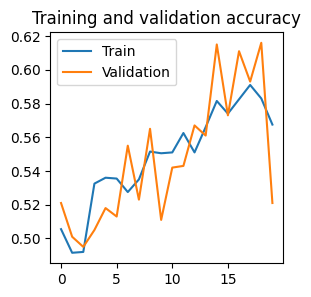

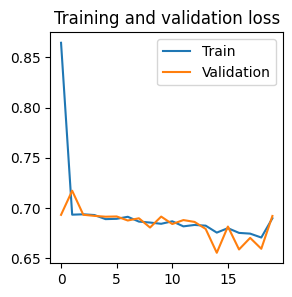

In [ ]:
### Charting the loss and accuracy by epoch ###
# Create list of Loss and Accuracy results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Number of epochs
plt.figure(figsize=(3,3)) 

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.gca().legend(('Train','Validation'))

plt.figure(figsize=(3,3)) 

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.gca().legend(('Train','Validation'))

#<font color='Orange'> 6: Fourth CNN

## <font color='Blue'> 6.1: Pre-trained architectures

I've tried various methods to improve CNN accuracy but not different architectures. Limited compute power makes HP tuning challenging, promoting the use of pre-trained architectures for transfer learning. Transfer Learning was conceived in 1976, allowing solutions for one challenge to be transferred to another *(Bozinovski, 2020)*. 

Several pre-trained image classification architectures exist on Keras. InceptionV3, a 2015 award winner, was pre-trained on 1.4M images from 1000 classes on ImageNet. It employed parallel processors and concatenates convolutional layers of varying, mostly small filter sizes. This computational efficiency method reduces network parameters without compromising accuracy *(Szegedy et al., 2015)*, [Fig4]. 

<font color='Orange'>**Fig 4: Inception V3 architecture** *(Google, 2019)*</font>
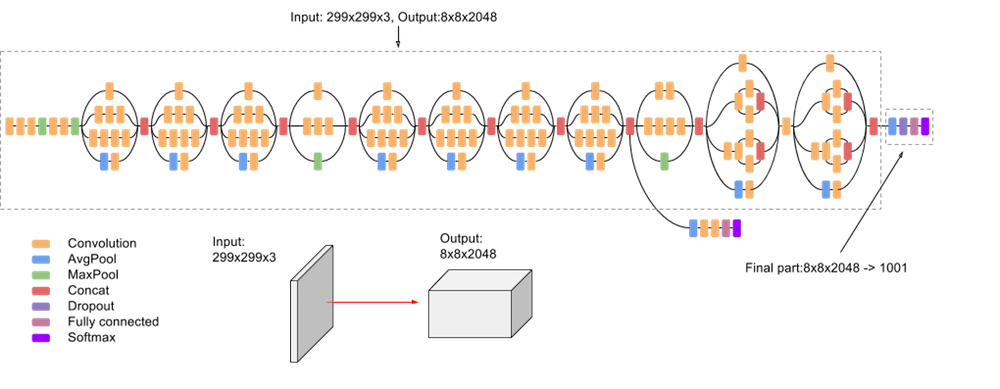

As Inception V3 was trained on huge volumes to predict 1000 image classes, I feel it will transfer well to predict cats vs. dogs, a view supported by a 96% success rate evidenced on the same dataset *(Huilgol, 2022)*. 

Inception V3 has many layers (see Fig5). Starting training at the output from the layer before the Flatten layer (the bottleneck layer), is common because the fully-connected layer is too specialised to the original task, whereas information in the bottleneck should generalise better to the task of labelling just 2 classes. *(Feng et al., 2019)*. 

<font color='Orange'> **Fig5: Detailed specification of Inception V3** *(Feng et al., 2019)*.</font>

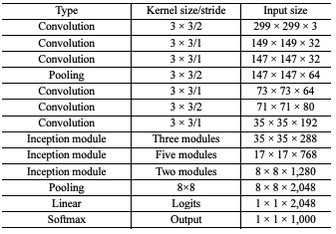

In [ ]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Downloading model weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-04-20 21:52:10--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 2a00:1450:4013:c07::80, 2a00:1450:4013:c08::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  25.2MB/s    in 3.3s    

2023-04-20 21:52:14 (25.2 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Import the weights from Keras applications and instantiate model
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(299, 299, 3), # Recommended image shape for Inception V3
    include_top=False, # exclude top layer to extract features only and apply to my use case.
    weights='imagenet') # train using weights from the imagenet training dataset
pre_trained_model.load_weights(local_weights_file)

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False # I don't want to retrain the model again, I'm using weights from the original model.

In [ ]:
# Visualise layers in InceptionV3 pre-trained model
print(pre_trained_model.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d_6[0][0]']               
 alization)                     )                                                      

In [ ]:
# I'll use `mixed7` layer for feature extraction. Though not the bottleneck, using its 7x7 feature map means 
# predicting from a larger feature map with more pertinent information. 

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 17, 17, 768)


In [ ]:
# Finally, I'll add a fully connected layer and Sigmoid classifier to the architecture.

from tensorflow.keras.optimizers import Adam

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x) # Adding drop-out rate of 0.2 for regularisation
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model4 = Model(pre_trained_model.input, x)
model4.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['acc'])

In [ ]:
# Below is my new CNN architecture showing new layers after mixed7, and the total trainable parameters.
model4.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d_6[0][0]']               
 alization)                     )                                                           

In [ ]:
# Adding data augmentation and scaling to fit pre-trained model requirements

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input, # scales input pixels between -1 and 1 as expected by InceptionV3
    rotation_range=45, # degrees of rotation is up to 45
    width_shift_range=0.15, # shifts image by up to 15% left or right horizontally
    height_shift_range=0.15, # shifts image vertically
    brightness_range=(0.8, 1.2), # multiplies pixel value by range between the two numbers shown
    shear_range=0.2, # moves bottom of picture horizontally by up to 20%
    zoom_range=0.2, # zooms into picture by up to 20%
    horizontal_flip=True, # randomly flips image horizontally
    vertical_flip=False, # in this case we won't flip vertically as we don't need to recognise upside down images
    fill_mode='nearest') # fills any new pixels created by above operations with value of nearest pixel

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(299, 299), 
        batch_size=20,
        shuffle=True,
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(299, 299),
        batch_size=20,
        shuffle=False,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Train the last layers of the model for my 2 classes
history = model4.fit(train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=val_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/10
100/100 - 63s - loss: 0.2189 - acc: 0.9155 - val_loss: 0.0326 - val_acc: 0.9880 - 63s/epoch - 630ms/step
Epoch 2/10
100/100 - 56s - loss: 0.0901 - acc: 0.9625 - val_loss: 0.0359 - val_acc: 0.9860 - 56s/epoch - 562ms/step
Epoch 3/10
100/100 - 57s - loss: 0.0688 - acc: 0.9735 - val_loss: 0.0324 - val_acc: 0.9890 - 57s/epoch - 569ms/step
Epoch 4/10
100/100 - 56s - loss: 0.0917 - acc: 0.9645 - val_loss: 0.0350 - val_acc: 0.9850 - 56s/epoch - 558ms/step
Epoch 5/10
100/100 - 57s - loss: 0.0676 - acc: 0.9755 - val_loss: 0.0242 - val_acc: 0.9900 - 57s/epoch - 571ms/step
Epoch 6/10
100/100 - 57s - loss: 0.0674 - acc: 0.9765 - val_loss: 0.0269 - val_acc: 0.9890 - 57s/epoch - 565ms/step
Epoch 7/10
100/100 - 57s - loss: 0.0480 - acc: 0.9805 - val_loss: 0.0166 - val_acc: 0.9950 - 57s/epoch - 574ms/step
Epoch 8/10
100/100 - 56s - loss: 0.0547 - acc: 0.9815 - val_loss: 0.0209 - val_acc: 0.9900 - 56s/epoch - 562ms/step
Epoch 9/10
100/100 - 57s - loss: 0.0288 - acc: 0.9905 - val_loss: 0.0163

In [ ]:
# Save the model for later reference
from tensorflow import keras
from google.colab import files

model_path = os.path.join(base_dir, 'save')
keras.models.save_model(model4, 'cnn_model_4')

## <font color='Blue'>6.2: Evaluation</font>
I have achieved 99% accuracy on my validation data with very low validation loss. It may be possible to improve this with more epochs, as the trend below shows that loss is still improving by epoch.

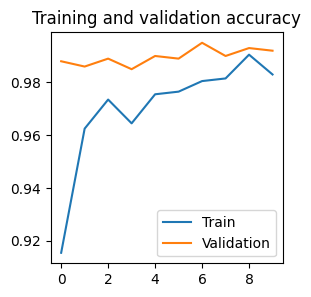

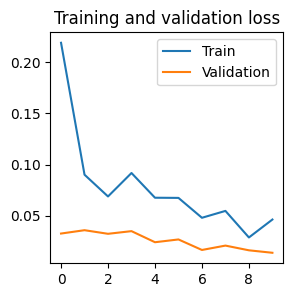

In [ ]:
### Charting the loss and accuracy by epoch ###
# Create list of Loss and Accuracy results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Number of epochs

plt.figure(figsize=(3,3))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.gca().legend(('Train','Validation'))

plt.figure(figsize=(3,3))

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.gca().legend(('Train','Validation'))

In [ ]:
import numpy as np

# I will predict the model outputs on our validation dataset
preds = model4.predict(val_generator, verbose=2)
y_pred = np.round(preds) # Takes Sigmoid output value between 0 and 1, which is probability of belonging positive class (1 = 
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())
print(model4.predict(val_generator).shape)

50/50 - 6s - 6s/epoch - 115ms/step
50/50 [==============================] - 6s 119ms/step
(1000, 1)


In [ ]:
# Create dataframe showing Predicted outputs vs. Actual outputs with labels for validation dataset.
import pandas as pd

print(val_generator.class_indices)
df = pd.DataFrame({'Filename': val_cat_fnames + val_dog_fnames, 
                   'Actual': np.ndarray.tolist(y_true), 
                       'Predicted': np.ndarray.tolist(y_pred), 
                       'Sigmoid output': np.ndarray.tolist(np.round((preds),4))})

df['Predicted'] = df['Predicted'].str.get(0)
df['Sigmoid output'] = df['Sigmoid output'].str.get(0)

# Add class labels
df['Actual_Class'] = ''
for i in range(len(df)):
    if df.loc[i, 'Actual'] == 0:
        df.loc[i, 'Actual_Class'] = 'Cat'
    else:
        df.loc[i, 'Actual_Class'] = 'Dog'
df['Predicted_Class'] = ''
for i in range(len(df)):
    if df.loc[i, 'Predicted'] == 0:
        df.loc[i, 'Predicted_Class'] = 'Cat'
    else:
        df.loc[i, 'Predicted_Class'] = 'Dog'

# Add classification outcome
df['Misclassification'] = ''
for i in range(len(df)):
    if df.loc[i, 'Actual'] == df.loc[i, 'Predicted']:
        df.loc[i, 'Misclassification'] = 'No'
    else:
        df.loc[i, 'Misclassification'] = 'Yes'

df.sample(20)

{'cats': 0, 'dogs': 1}


Filename  Actual  Predicted  Sigmoid output Actual_Class  \
87   cat.2266.jpg       0        0.0          0.0000          Cat   
569  dog.2270.jpg       1        1.0          1.0000          Dog   
767  dog.2474.jpg       1        1.0          1.0000          Dog   
120  cat.2367.jpg       0        0.0          0.0000          Cat   
456  cat.2050.jpg       0        0.0          0.0002          Cat   
942  dog.2437.jpg       1        1.0          1.0000          Dog   
691  dog.2143.jpg       1        1.0          1.0000          Dog   
75   cat.2240.jpg       0        0.0          0.0000          Cat   
227  cat.2434.jpg       0        0.0          0.0000          Cat   
739  dog.2304.jpg       1        1.0          1.0000          Dog   
18   cat.2014.jpg       0        0.0          0.0000          Cat   
238  cat.2016.jpg       0        0.0          0.0000          Cat   
819  dog.2484.jpg       1        1.0          1.0000          Dog   
934  dog.2475.jpg       1        1.0          1.0000          Dog   
383  cat.2221.jpg       0        0.0          0.0000          Cat   
772  dog.2329.jpg       1        1.0          1.0000          Dog   
694  dog.2095.jpg       1        1.0          1.0000          Dog   
334  cat.2008.jpg       0        0.0          0.0000          Cat   
555  dog.2293.jpg       1        1.0          1.0000          Dog   
802  dog.2416.jpg       1        1.0          1.0000          Dog   

    Predicted_Class Misclassification  
87              Cat                No  
569             Dog                No  
767             Dog                No  
120             Cat                No  
456             Cat                No  
942             Dog                No  
691             Dog                No  
75              Cat                No  
227             Cat                No  
739             Dog                No  
18              Cat                No  
238             Cat                No  
819             Dog                No  
934             Dog                No  
383             Cat                No  
772             Dog                No  
694             Dog                No  
334             Cat                No  
555             Dog                No  
802             Dog                No

              precision    recall  f1-score   support

        cats       0.99      0.99      0.99       500
        dogs       0.99      0.99      0.99       500

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



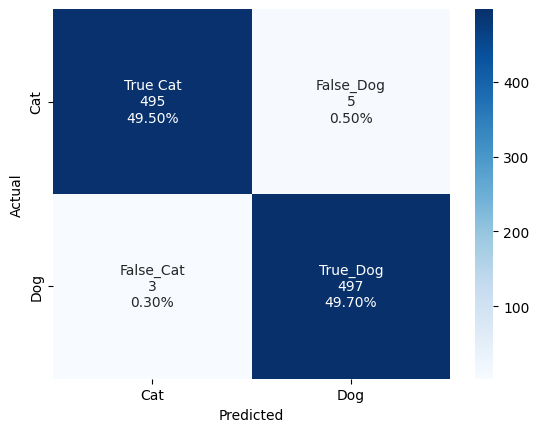

In [ ]:
%matplotlib inline
# Show confusion matrix & classification report
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

class_rep = classification_report(y_true, y_pred, target_names=class_names)
conf_mat = confusion_matrix(y_true, y_pred)

categories = ['Cat', 'Dog']
group_names = ['True Cat','False_Dog','False_Cat','True_Dog']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_mat, annot=labels, fmt='', 
            xticklabels=categories, 
            yticklabels=categories,
            cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

print(class_rep)

My InceptionV3 transferred learning CNN has labelled 49.8% of images as cat and 50.2% as dog, with a validation accuracy of 99%!

Below I've printed the images that my updated model misclassified, many of which contain more than one cat/dog.


In [ ]:
# Create dataframes of misclassified images for viewing
misclassified_cat_df = df[(df['Misclassification'] == 'Yes') & (df['Actual_Class'] =='Cat')]
misclassified_dog_df = df[(df['Misclassification'] == 'Yes') & (df['Actual_Class'] =='Dog')]
misclassified_cat_df, misclassified_dog_df

(         Filename  Actual  Predicted  Sigmoid output Actual_Class  \
 29   cat.2407.jpg       0        1.0          0.7441          Cat   
 150  cat.2255.jpg       0        1.0          0.5883          Cat   
 337  cat.2345.jpg       0        1.0          0.5871          Cat   
 422  cat.2013.jpg       0        1.0          0.5192          Cat   
 457  cat.2423.jpg       0        1.0          0.5303          Cat   
 
     Predicted_Class Misclassification  
 29              Dog               Yes  
 150             Dog               Yes  
 337             Dog               Yes  
 422             Dog               Yes  
 457             Dog               Yes  ,
          Filename  Actual  Predicted  Sigmoid output Actual_Class  \
 764  dog.2370.jpg       1        0.0          0.3692          Dog   
 771  dog.2254.jpg       1        0.0          0.2842          Dog   
 860  dog.2146.jpg       1        0.0          0.1225          Dog   
 
     Predicted_Class Misclassification  
 764    

In [ ]:
# Create list of misclassified dogs and cats to feed into for loop
misclass_list_cat = misclassified_cat_df['Filename'].values.tolist()
misclass_list_dog = misclassified_dog_df['Filename'].values.tolist()
print("List of misclassified cats:", misclass_list_cat)
print("List of misclassified dogs:", misclass_list_dog)

List of misclassified cats: ['cat.2407.jpg', 'cat.2255.jpg', 'cat.2345.jpg', 'cat.2013.jpg', 'cat.2423.jpg']
List of misclassified dogs: ['dog.2370.jpg', 'dog.2254.jpg', 'dog.2146.jpg']


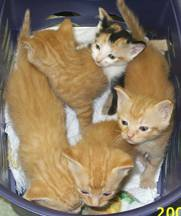

Cat misclassified as Dog: cat.2407.jpg


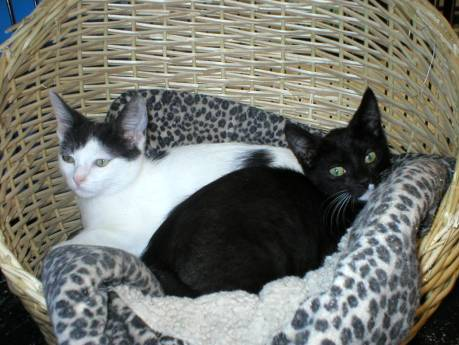

Cat misclassified as Dog: cat.2255.jpg


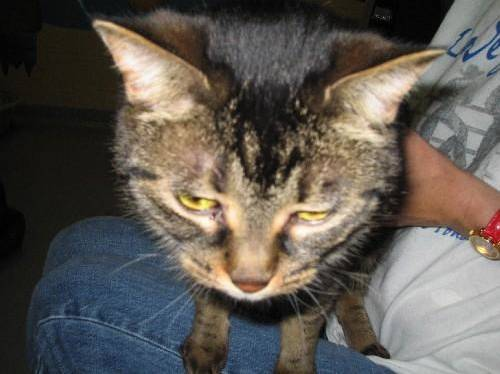

Cat misclassified as Dog: cat.2345.jpg


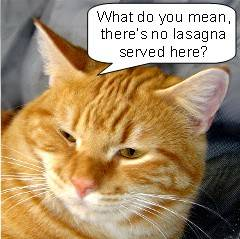

Cat misclassified as Dog: cat.2013.jpg


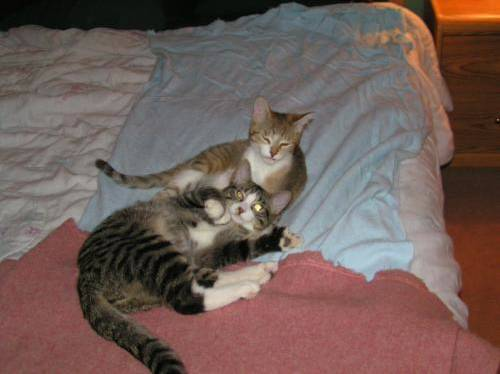

Cat misclassified as Dog: cat.2423.jpg


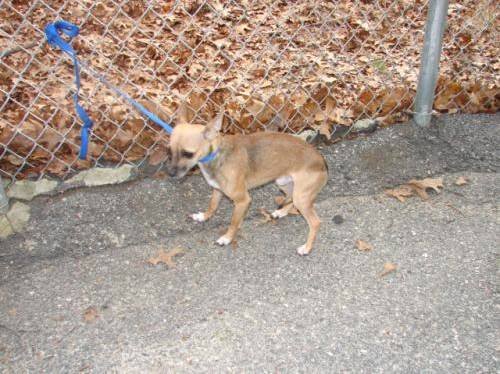

Dog misclassified as Cat: dog.2370.jpg


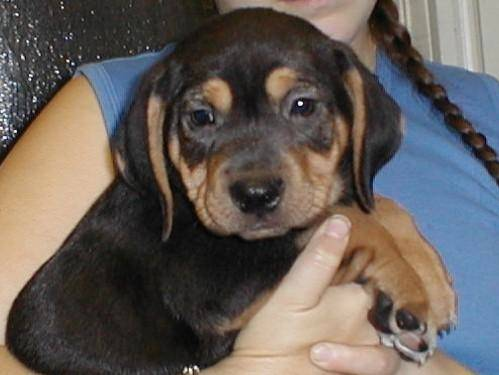

Dog misclassified as Cat: dog.2254.jpg


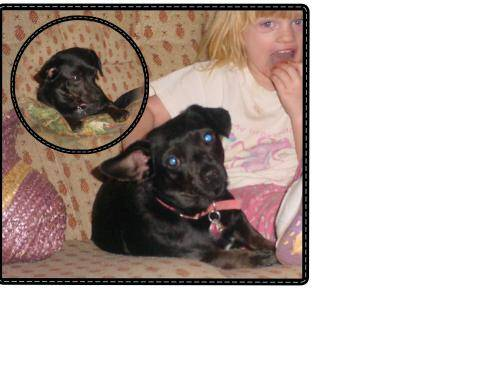

Dog misclassified as Cat: dog.2146.jpg


In [ ]:
# Showing misclassified images
from IPython.display import display, Image

for img in misclass_list_cat:
  display(Image(filename=os.path.join(val_cats_dir, str(img))))
  print("Cat misclassified as Dog:", str(img))

for img in misclass_list_dog:
  display(Image(filename=os.path.join(val_dogs_dir, str(img))))
  print("Dog misclassified as Cat:", str(img))

#<font color='Orange'> 7: Fifth CNN

## <font color='Blue'> 7.1: Fine Tuning</font>
Fine-tuning the top layers of my model can achieve even greater results. Higher layers of a CNN are more specific then lower levels, which focus on generalised features, so teaching my pre-trained model to focus on the features in my dataset can help tune transferred learning from the imagenet dataset.

To train higher layers of InceptionV3, I'll unfreeze layers found after `mixed6`, the sixth concatenation stage, making these layers trainable.

In [ ]:
from tensorflow.keras.optimizers import Adam

unfreeze = False

# Unfreeze all layers after "mixed6"
for layer in pre_trained_model.layers:
  if unfreeze:
    layer.trainable = True
  if layer.name == 'mixed6':
    unfreeze = True

# I need to recompile for the above changes to be implemented
model5 = Model(pre_trained_model.input, x)
model5.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['acc'])

In [ ]:
# Retrain the model again
history = model5.fit(train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=val_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/10
100/100 - 68s - loss: 0.3486 - acc: 0.9625 - val_loss: 0.0853 - val_acc: 0.9910 - 68s/epoch - 675ms/step
Epoch 2/10
100/100 - 59s - loss: 0.1333 - acc: 0.9750 - val_loss: 0.0238 - val_acc: 0.9950 - 59s/epoch - 591ms/step
Epoch 3/10
100/100 - 59s - loss: 0.0786 - acc: 0.9835 - val_loss: 0.0316 - val_acc: 0.9890 - 59s/epoch - 594ms/step
Epoch 4/10
100/100 - 57s - loss: 0.0939 - acc: 0.9780 - val_loss: 0.0254 - val_acc: 0.9910 - 57s/epoch - 575ms/step
Epoch 5/10
100/100 - 58s - loss: 0.0724 - acc: 0.9815 - val_loss: 0.0404 - val_acc: 0.9880 - 58s/epoch - 582ms/step
Epoch 6/10
100/100 - 57s - loss: 0.0917 - acc: 0.9775 - val_loss: 0.0343 - val_acc: 0.9920 - 57s/epoch - 572ms/step
Epoch 7/10
100/100 - 58s - loss: 0.0531 - acc: 0.9820 - val_loss: 0.0414 - val_acc: 0.9930 - 58s/epoch - 579ms/step
Epoch 8/10
100/100 - 58s - loss: 0.0533 - acc: 0.9870 - val_loss: 0.0294 - val_acc: 0.9900 - 58s/epoch - 576ms/step
Epoch 9/10
100/100 - 59s - loss: 0.0633 - acc: 0.9875 - val_loss: 0.0264

In [ ]:
# Save the model for later reference
from tensorflow import keras
from google.colab import files

model_path = os.path.join(base_dir, 'save')
keras.models.save_model(model5, 'cnn_model_5')

## <font color='Blue'>7.2: Evaluation</font>
Again, I've achieved 99% accuracy, so re-training higher layers of InceptionV3 offered no improvement.

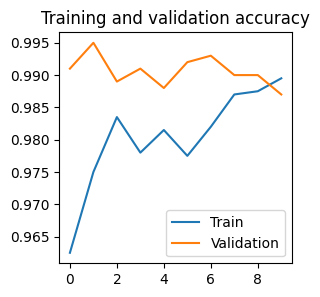

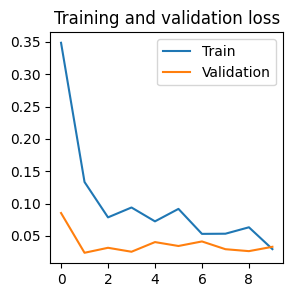

In [ ]:
### Charting the loss and accuracy by epoch ###
# Create list of Loss and Accuracy results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Number of epochs

plt.figure(figsize=(3,3))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.gca().legend(('Train','Validation'))

plt.figure(figsize=(3,3))

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.gca().legend(('Train','Validation'))

In [ ]:
import numpy as np

# I will predict the model outputs on our validation dataset
preds = model5.predict(val_generator, verbose=2)
y_pred = np.round(preds) # Takes Sigmoid output value between 0 and 1, which is probability of belonging positive class (1 = 
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())
print(model5.predict(val_generator).shape)

50/50 - 6s - 6s/epoch - 116ms/step
50/50 [==============================] - 6s 115ms/step
(1000, 1)


In [ ]:
# Create dataframe showing Predicted outputs vs. Actual outputs with labels for validation dataset.
import pandas as pd

print(val_generator.class_indices)
df = pd.DataFrame({'Filename': val_cat_fnames + val_dog_fnames, 
                   'Actual': np.ndarray.tolist(y_true), 
                       'Predicted': np.ndarray.tolist(y_pred), 
                       'Sigmoid output': np.ndarray.tolist(np.round((preds),4))})

df['Predicted'] = df['Predicted'].str.get(0)
df['Sigmoid output'] = df['Sigmoid output'].str.get(0)

# Add class labels
df['Actual_Class'] = ''
for i in range(len(df)):
    if df.loc[i, 'Actual'] == 0:
        df.loc[i, 'Actual_Class'] = 'Cat'
    else:
        df.loc[i, 'Actual_Class'] = 'Dog'
df['Predicted_Class'] = ''
for i in range(len(df)):
    if df.loc[i, 'Predicted'] == 0:
        df.loc[i, 'Predicted_Class'] = 'Cat'
    else:
        df.loc[i, 'Predicted_Class'] = 'Dog'

# Add classification outcome
df['Misclassification'] = ''
for i in range(len(df)):
    if df.loc[i, 'Actual'] == df.loc[i, 'Predicted']:
        df.loc[i, 'Misclassification'] = 'No'
    else:
        df.loc[i, 'Misclassification'] = 'Yes'

df.sample(20)

{'cats': 0, 'dogs': 1}


Filename  Actual  Predicted  Sigmoid output Actual_Class  \
723  dog.2398.jpg       1        1.0          1.0000          Dog   
750  dog.2130.jpg       1        1.0          1.0000          Dog   
137  cat.2429.jpg       0        0.0          0.0000          Cat   
80   cat.2209.jpg       0        0.0          0.0000          Cat   
985  dog.2090.jpg       1        1.0          1.0000          Dog   
921  dog.2257.jpg       1        1.0          1.0000          Dog   
618  dog.2401.jpg       1        1.0          1.0000          Dog   
852  dog.2421.jpg       1        1.0          1.0000          Dog   
878  dog.2396.jpg       1        1.0          1.0000          Dog   
73   cat.2312.jpg       0        0.0          0.0000          Cat   
848  dog.2375.jpg       1        1.0          1.0000          Dog   
730  dog.2119.jpg       1        1.0          1.0000          Dog   
304  cat.2092.jpg       0        0.0          0.0000          Cat   
630  dog.2272.jpg       1        1.0          0.9884          Dog   
200  cat.2098.jpg       0        0.0          0.0000          Cat   
431  cat.2471.jpg       0        0.0          0.0000          Cat   
631  dog.2317.jpg       1        1.0          1.0000          Dog   
988  dog.2098.jpg       1        1.0          1.0000          Dog   
235  cat.2472.jpg       0        0.0          0.0000          Cat   
447  cat.2169.jpg       0        0.0          0.0000          Cat   

    Predicted_Class Misclassification  
723             Dog                No  
750             Dog                No  
137             Cat                No  
80              Cat                No  
985             Dog                No  
921             Dog                No  
618             Dog                No  
852             Dog                No  
878             Dog                No  
73              Cat                No  
848             Dog                No  
730             Dog                No  
304             Cat                No  
630             Dog                No  
200             Cat                No  
431             Cat                No  
631             Dog                No  
988             Dog                No  
235             Cat                No  
447             Cat                No

              precision    recall  f1-score   support

        cats       1.00      0.98      0.99       500
        dogs       0.98      1.00      0.99       500

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



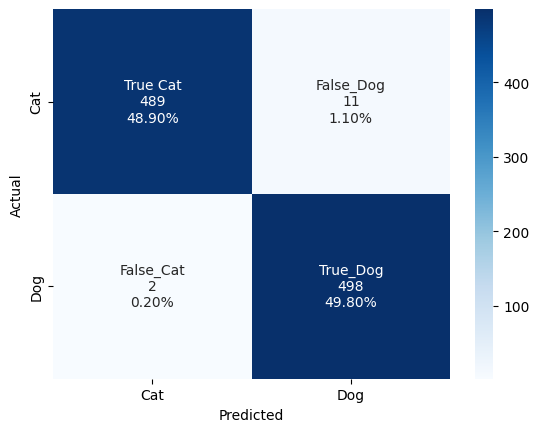

In [ ]:
%matplotlib inline
# Show confusion matrix & classification report
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

class_rep = classification_report(y_true, y_pred, target_names=class_names)
conf_mat = confusion_matrix(y_true, y_pred)

categories = ['Cat', 'Dog']
group_names = ['True Cat','False_Dog','False_Cat','True_Dog']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_mat, annot=labels, fmt='', 
            xticklabels=categories, 
            yticklabels=categories,
            cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

print(class_rep)

#<font color='Orange'> 8: Summary/Conclusion </font>



I have built 5 CNN models: 

1. Initial 3-layer CNN achieved 70% validation accuracy but was overfitted. 
2. Augmented data reduced generalisation, achieving 78% accuracy. 
3. Trialing two hyperparameter tuning algorithms, didn’t improve accuracy, with 71% the highest. 
4. Feature transference using InceptionV3 pre-trained on imagenet achieved 99% accuracy. 
5. Fine-tuning InceptionV3 architecture achieved 99% accuracy. 

In conclusion, I would recommend using transfer learning followed by fine-tuning, then hyperparameter tuning on the retrained parts to achieve best results. This approach leverages pre-trained models and their outputs trained on large datasets and compute capacity, making it more successful and efficient than trial and error with hyperparameter tuning. 

#<font color='Orange'> 9. References

Abraham, A. (2020). A (Slightly) Better Budget Allocation for Hyperband. [online] blog.dataiku.com. Available at: https://blog.dataiku.com/a-slightly-better-budget-allocation-for-hyperband [Accessed 15 Apr. 2023]. 

Agarap, A.F. (2019). Deep Learning using Rectified Linear Units (ReLU). [online] Arxiv. Available at: https://arxiv.org/abs/1803.08375 [Accessed 15 Apr. 2023]. 

Agnihotri, A. and Batra, N. (2020). Exploring Bayesian Optimization. Distill, 5(5). doi:https://doi.org/10.23915/distill.00026. 

Atienza, R. (2021). Improving Model Generalization by Agreement of Learned Representations from Data Augmentation. [online] Available at: https://arxiv.org/abs/2110.10536 [Accessed 3 Apr. 2023]. 

Bozinovski, S. (2020). Reminder of the First Paper on Transfer Learning in Neural Networks, 1976. Informatica, [online] 44(3). doi:https://doi.org/10.31449/inf.v44i3.2828. 

Brownlee, J. (2019a). How Do Convolutional Layers Work in Deep Learning Neural Networks? [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/ [Accessed 31 Mar. 2023]. 

Brownlee, J. (2019b). How to Normalize, Center, and Standardize Image Pixels in Keras. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras [Accessed 31 Mar. 2023]. 

Brownlee, J. (2020). How to Control the Stability of Training Neural Networks With the Batch Size. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/ [Accessed 19 Apr. 2023]. 

Feng, C., Zhang, H., Wang, S., Li, Y., Wang, H. and Yan, F. (2019). Structural Damage Detection using Deep Convolutional Neural Network and Transfer Learning. KSCE Journal of Civil Engineering, 23(10), pp.4493–4502. doi:https://doi.org/10.1007/s12205-019-0437-z. 

GéronA. (2019). Hands-on machine learning with Scikit-Learn and TensorFlow concepts, tools, and techniques to build intelligent systems. O’Reilly Media, Inc. 

Google (2019). Advanced Guide to Inception v3 on Cloud TPU  |  Cloud TPU 
        |  Google Cloud. [online] Google Cloud. Available at: https://cloud.google.com/tpu/docs/inception-v3-advanced [Accessed 17 Apr. 2023]. 

Google (n.d.). Machine Learning Glossary. [online] Google Developers. Available at: https://developers.google.com/machine-learning/glossary [Accessed 11 Mar. 2023]. 

Huilgol, P. (2022). Top 4 Pre-Trained Models for Image Classification | With Python Code. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/ [Accessed 17 Apr. 2023]. 

Kingma, D. and Lei Ba, J. (2017). ADAM: A METHOD FOR STOCHASTIC OPTIMIZATION. [online] Available at: https://arxiv.org/pdf/1412.6980.pdf [Accessed 14 Apr. 2023]. 

Krizhevsky, A., Sutskever, I. and Hinton, G.E. (2012). ImageNet classification with deep convolutional neural networks. Communications of the ACM, 60(6), pp.84–90. doi:https://doi.org/10.1145/3065386. 

Kumar, A. (2021). Real-World Applications of Convolutional Neural Networks. [online] Vitalflux. Available at: https://vitalflux.com/real-world-applications-of-convolutional-neural-networks/ [Accessed 3 Apr. 2023]. 

Li, L., Jamieson, K. and Rostamizadeh, A. (2018). Hyperband: A Novel Bandit-Based Approach to Hyperparameter Optimization. Journal of Machine Learning Research, [online] 18(18), pp.1–52. Available at: https://jmlr.org/papers/volume18/16-558/16-558.pdf [Accessed 15 Apr. 2023]. 

Mehta, S. (2022). Speed-up hyperparameter tuning in deep learning with Keras hyperband tuner. [online] Analytics India Magazine. Available at: https://analyticsindiamag.com/speed-up-hyperparameter-tuning-in-deep-learning-with-keras-hyperband-tuner/ [Accessed 15 Apr. 2023]. 

Perez, L. and Wang, J. (2017). The Effectiveness of Data Augmentation in Image Classification using Deep Learning. [online] 1. Available at: https://arxiv.org/abs/1712.04621 [Accessed 3 Apr. 2023]. 

Qayyam, R. (2022). Introduction To Pooling Layers In CNN – Towards AI. [online] towardsai.net. Available at: https://towardsai.net/p/l/introduction-to-pooling-layers-in-cnn#:~:text=Max%20pooling%3A%20This%20works%20by [Accessed 31 Mar. 2023]. 

Ranjit, M.P., Ganapathy, G., Sridhar, K. and Arumugham, V. (2019). Efficient Deep Learning Hyperparameter Tuning Using Cloud Infrastructure: Intelligent Distributed Hyperparameter Tuning with Bayesian Optimization in the Cloud. [online] IEEE Xplore. doi:https://doi.org/10.1109/CLOUD.2019.00097. 

Rendyk (2021). Tuning the Hyperparameters and Layers of Neural Network Deep Learning. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/05/tuning-the-hyperparameters-and-layers-of-neural-network-deep-learning/ [Accessed 20 Apr. 2023]. 

Sola, J. and Sevilla, J. (1997). Importance of input data normalization for the application of neural networks to complex industrial problems. IEEE Transactions on Nuclear Science, [online] 44(3), pp.1464–1468. doi:https://doi.org/10.1109/23.589532. 

Szegedy, C., Vanhoucke, V., Ioffe, S., Shlens, J. and Wojna, Z. (2015). Rethinking the Inception Architecture for Computer Vision. arXiv:1512.00567 [cs]. [online] Available at: https://arxiv.org/abs/1512.00567v3 [Accessed 17 Apr. 2023]. 

Tensorflow (n.d.). tf.keras.preprocessing.image.ImageDataGenerator. [online] TensorFlow. Available at: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator [Accessed 31 Mar. 2023]. 

Zammito, F. (2019). What’s considered a good Log Loss in Machine Learning ? [online] Medium. Available at: https://medium.com/@fzammito/whats-considered-a-good-log-loss-in-machine-learning-a529d400632d [Accessed 3 Apr. 2023]. 